# Data Wrangling Template

## Gather

In [1500]:
import requests

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', 'w') as f:
  f.write(r.text)

## Assess

### 1. load the enhanced twitter archive

In [1501]:
import pandas as pd
df_twitter_archive_enhanced = pd.read_csv('./twitter-archive-enhanced.csv')

df_twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [1502]:
df_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Missing Values
- source values not clear

### 2. load the image-prediction tsv

In [1503]:
df_image_predictions = pd.read_csv('./image-predictions.tsv', sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [1504]:
df_image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [1505]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- give p1, p2, ... more descriptiv names
- delete data there `p1_dog` and `p2_dog` is false because it means there is no Dog detected

### 3. Twitter API
( data was queryied by `extract_twitter_data.py )

In [1506]:
df_tweets_json = pd.read_json('./tweet-json.json')

df_tweets_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [1507]:
df_tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

- delete not used fields

## Assessing Data

In [1508]:
df_twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [1509]:
df_twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [1510]:
df_twitter_archive_enhanced.shape

(2356, 17)

In [1511]:
df_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1438,774314403806253056,https://pbs.twimg.com/media/Cr7q1VxWIAA5Nm7.jpg,3,Eskimo_dog,0.596045,True,Siberian_husky,0.223067,True,Saluki,0.036325,True
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True
895,699446877801091073,https://pbs.twimg.com/media/CbTvNpoW0AEemnx.jpg,3,Pembroke,0.969400,True,Cardigan,0.026059,True,Chihuahua,0.003505,True
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,1,Lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
389,673359818736984064,https://pbs.twimg.com/media/CVhBLohWEAAXtYl.jpg,1,English_setter,0.696568,True,Brittany_spaniel,0.104046,True,Ibizan_hound,0.034832,True
1494,783334639985389568,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
1121,726887082820554753,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated_wheaten_terrier,0.515919,True,Irish_terrier,0.162655,True,Chesapeake_Bay_retriever,0.125182,True
1469,779056095788752897,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
459,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,Labrador_retriever,0.801903,True,Chesapeake_Bay_retriever,0.193575,True,Rottweiler,0.001193,True


In [1512]:
df_image_predictions.p1_dog.value_counts(normalize=True).mul(100).astype(str)+'%'

True     73.83132530120481%
False    26.16867469879518%
Name: p1_dog, dtype: object

In [1513]:
df_image_predictions.p2_dog.value_counts(normalize=True).mul(100).astype(str)+'%'

True     74.8433734939759%
False    25.1566265060241%
Name: p2_dog, dtype: object

In [1514]:
df_tweets_json.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1538,2016-01-20 04:03:02+00:00,689659372465688576,689659372465688576,This is Ricky. He's being escorted out of the ...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689659367294136321, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,11394,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
209,2017-04-12 16:00:27+00:00,852189679701164033,852189679701164032,This is Sailor. He has collected the best dirt...,False,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 852189646159327233, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12217,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
897,2016-07-29 00:57:05+00:00,758828659922702336,758828659922702336,This doggo is just waiting for someone to be p...,False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 758828647570558976, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12376,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1686,2015-12-28 17:12:42+00:00,681523177663676416,681523177663676416,This is Carly. She's actually 2 dogs fused tog...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 681523166406164481, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,15749,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2270,2015-11-19 23:53:52+00:00,667491009379606528,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667491008582541313, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,559,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1153,2016-04-26 15:29:30+00:00,724983749226668032,724983749226668032,This is Fred-Rick. He dabbles in parkour. The ...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 724983740980690944, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4040,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
588,2016-11-17 17:50:33+00:00,799308762079035393,799308762079035392,RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,True,False,NaN,NaN,en,{'created_at': 'Fri Sep 09 18:31:54 +0000 2016...,NaN,NaN,NaN
1324,2016-03-05 16:24:01+00:00,706153300320784384,706153300320784384,This is Layla. She's giving you a standing ova...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,1632,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1222,2016-03-27 22:14:49+00:00,714214115368108032,714214115368108032,Happy Easter from the squad! 🐇🐶 13/10 for all ...,False,"[0, 69]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 714214106660741120, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2480,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1278,2016-03-13 01:57:25+00:00,708834316713893888,708834316713893888,Meet Malikai. He was rolling around having fun...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 708834245947559936, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1860,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


## Quality Issues

- Twitter Archive Enhanced Dataframe
  - Drop `retweeted_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id`
  - `source` colum should be categorical
  - `timestamp` colum should be renamed `archive_timestamp`

- Image Prediction Dataframe
  - rows there no Dog can be identified because `*_dog` was false should be droped
  - `p1`, `p2` and `p3` should be categorical as well as the colums should be descriptiv
  - the confidence level `p1_conf`, `p2_conf` and `p3_conf` should be mearged together
  - colums `*_dog` should be merged

- Tweets Json Dataframe
  - Drop Colums like `id_str` and any other `*_str` column
  - Cast `created_at` as a datetime object instead of string

## Tidiness Issues
- In the image_prediction Dataframe we should drop `img_num` dataframe after everything else was merged
- all the Dataframes (Twitter Archive, Twitter Json, Image Prediction) should be merged for easy analisys
- merge the doggo, floofer, pupper and puppo colums together

## Clean
Let's cleanup the data but first make a copy

In [1515]:
df_twitter_archive_enhanced_clean = df_twitter_archive_enhanced.copy()
df_tweets_json_clean = df_tweets_json.copy()
df_image_predictions_clean = df_image_predictions.copy()

#### Define Twitter Archive Enhanced

Copy the data into new dataframes and drop not needed colums then it will be merged into one big dataframe

#### Code

Drop colums we no longer need and rename `timestamp` to `archive_timestamp`

In [1516]:
df_twitter_archive_enhanced_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id' ,'retweeted_status_timestamp', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_id'], inplace=True)
df_twitter_archive_enhanced_clean.rename(columns={'timestamp': 'archive_timestamp'}, inplace=True)
df_twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   archive_timestamp   2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


Make the source data categorical

In [1517]:
df_twitter_archive_enhanced_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We have 4 sources `Twitter Iphone`, `Vine`, `Twitter Web` and `Tweet Deck`

In [1518]:
source_categories = {
  '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'twitter_iphone',
  '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'vine',
  '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'twitter_web',
  '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'twitter_deck'
}

df_twitter_archive_enhanced_clean.replace(source_categories, inplace=True)
df_twitter_archive_enhanced_clean.source.astype('category')


0       twitter_iphone
1       twitter_iphone
2       twitter_iphone
3       twitter_iphone
4       twitter_iphone
             ...      
2351    twitter_iphone
2352    twitter_iphone
2353    twitter_iphone
2354    twitter_iphone
2355    twitter_iphone
Name: source, Length: 2356, dtype: category
Categories (4, object): ['twitter_deck', 'twitter_iphone', 'twitter_web', 'vine']

Merge the Life stage colums together

In [1519]:
melt_coumns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_twitter_archive_enhanced_clean.columns.tolist() if x not in melt_coumns]

# Melt the the columns into values
df_twitter_archive_enhanced_clean = pd.melt(df_twitter_archive_enhanced_clean, id_vars = stay_columns, value_vars = melt_coumns, 
                         var_name = 'stages', value_name = 'life_stage')


df_twitter_archive_enhanced_clean.drop('stages', axis=1, inplace=True)

df_twitter_archive_enhanced_clean.head(1)


,tweet_id,archive_timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,twitter_iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None


#### Test

This should match our wanted result, short and consise

In [1520]:
df_twitter_archive_enhanced_clean.sample(5)

,tweet_id,archive_timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage
5228,810984652412424192,2016-12-19 23:06:23 +0000,twitter_iphone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None
3946,686618349602762752,2016-01-11 18:39:05 +0000,twitter_iphone,This is Olivia. She just saw an adult wearing ...,https://twitter.com/dog_rates/status/686618349...,11,10,Olivia,None
290,838150277551247360,2017-03-04 22:12:52 +0000,twitter_iphone,@markhoppus 182/10,NaN,182,10,None,None
448,819006400881917954,2017-01-11 02:21:57 +0000,twitter_iphone,This is Sunny. She was also a very good First ...,https://twitter.com/dog_rates/status/819006400...,14,10,Sunny,doggo
1737,679530280114372609,2015-12-23 05:13:38 +0000,twitter_iphone,Guys this really needs to stop. We've been ove...,https://twitter.com/dog_rates/status/679530280...,7,10,a,None


And our new life_stage column has the right datatype

In [1521]:
df_twitter_archive_enhanced_clean.life_stage.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9424 entries, 0 to 9423
Series name: life_stage
Non-Null Count  Dtype 
--------------  ----- 
9424 non-null   object
dtypes: object(1)
memory usage: 73.8+ KB


#### Define Image Prediction

- Drop rows there no dog can be found because `*_dog` was set to False
- Merge colums

#### Code

Drop rows there no dog was found

In [1522]:
mask = df_image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog']].all(axis=1) == False
df_image_predictions = df_image_predictions.loc[mask, :]

Before dropping not needed Colums in the image prediction dataframe it would be good to merge `p*`, `p*_conf` and `p*_dog` colums

In [1523]:
# Merge the breed together
df_image_predictions_clean['breed'] = df_image_predictions_clean[['p1', 'p2', 'p3']].apply(lambda x: '_'.join(x), axis=1)

# merge the confident level colums together
df_image_predictions_clean['conf'] = df_image_predictions_clean[['p1_conf', 'p2_conf', 'p3_conf']].apply(lambda x: '_'.join(x.astype(str)), axis=1)

# merge the boolean columns together
df_image_predictions_clean['is_dog'] = df_image_predictions_clean[['p1_dog', 'p2_dog', 'p3_dog']].any(axis=1)

# drop the original colums
df_image_predictions_clean.drop(['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis=1, inplace=True)

#### Test

In [1524]:
df_image_predictions_clean.head()

,tweet_id,jpg_url,img_num,breed,conf,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel_collie_Shetland_sheepdog,0.465074_0.156665_0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone_miniature_pinscher_Rhodesian_ridgeback,0.506826_0.0741916999999999_0.07201,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd_malinois_bloodhound,0.596461_0.1385839999999999_0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback_redbone_miniature_pinscher,0.408143_0.360687_0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher_Rottweiler_Doberman,0.560311_0.243682_0.154629,True


#### Define Tweet JSON

Keep only the neede fields and drop everything else

Needed:
- `retweet_count`
- `favorite_count`
- `id` -> convert to tweet_id

#### Code

In [1525]:
df_tweets_json_clean = df_tweets_json_clean[['id', 'retweet_count', 'favorite_count']]
df_tweets_json_clean['tweet_id'] = df_tweets_json.id
df_tweets_json_clean.drop(columns=['id'], inplace=True)

#### Test

In [1526]:
df_tweets_json_clean.sample(5)

,retweet_count,favorite_count,tweet_id
136,8952,0,866094527597207552
1982,550,1452,672902681409806336
1265,1367,3865,709566166965075968
1611,1234,3676,685315239903100929
1511,1019,3253,691096613310316544


#### Merge the final dataset!

In [1527]:
df_merged_archive_api = pd.merge(df_twitter_archive_enhanced_clean, df_tweets_json_clean, on='tweet_id', how='inner')
df_master = pd.merge(df_merged_archive_api, df_image_predictions_clean, on='tweet_id', how='inner')

df_master.sample(5)

,tweet_id,archive_timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,life_stage,retweet_count,favorite_count,jpg_url,img_num,breed,conf,is_dog
7247,670786190031921152,2015-11-29 02:07:44 +0000,twitter_iphone,This is Creg. You offered him a ride to work b...,https://twitter.com/dog_rates/status/670786190...,8,10,Creg,None,218,640,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo_Pembroke_Cardigan,0.7771239999999999_0.127438_0.0240065999999999,True
7161,671134062904504320,2015-11-30 01:10:04 +0000,twitter_iphone,Say hello to Clarence. He's a western Alkaline...,https://twitter.com/dog_rates/status/671134062...,8,10,Clarence,None,212,796,https://pbs.twimg.com/media/CVBY3e7XIAAAE4Y.jpg,1,Shih-Tzu_golden_retriever_Labrador_retriever,0.1803799999999999_0.180194_0.173656,True
2907,759197388317847553,2016-07-30 01:22:17 +0000,twitter_iphone,This is Luna. She's just heckin precious af I ...,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,None,2221,6725,https://pbs.twimg.com/media/Cok1_sjXgAU3xpp.jpg,1,kuvasz_golden_retriever_white_wolf,0.5113409999999999_0.0768991_0.0632693999999999,True
6108,677314812125323265,2015-12-17 02:30:09 +0000,twitter_iphone,"Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,10,10,Tassy,None,611,1799,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,2,Blenheim_spaniel_Japanese_spaniel_Chihuahua,0.924127_0.0547900999999999_0.00820404,True
1076,832215726631055365,2017-02-16 13:11:05 +0000,twitter_iphone,RT @dog_rates: This is Moreton. He's the Good ...,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,10723,0,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound_borzoi_doormat,0.2746369999999999_0.142204_0.109677,True


In [1528]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8292 entries, 0 to 8291
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            8292 non-null   int64 
 1   archive_timestamp   8292 non-null   object
 2   source              8292 non-null   object
 3   text                8292 non-null   object
 4   expanded_urls       8292 non-null   object
 5   rating_numerator    8292 non-null   int64 
 6   rating_denominator  8292 non-null   int64 
 7   name                8292 non-null   object
 8   life_stage          8292 non-null   object
 9   retweet_count       8292 non-null   int64 
 10  favorite_count      8292 non-null   int64 
 11  jpg_url             8292 non-null   object
 12  img_num             8292 non-null   int64 
 13  breed               8292 non-null   object
 14  conf                8292 non-null   object
 15  is_dog              8292 non-null   bool  
dtypes: bool(1), int64(6), ob

Let's fix some datatypes

In [1529]:
df_master.archive_timestamp = pd.to_datetime(df_master.archive_timestamp)

After we are done, we export the final dataset befor we do the analysis

In [1530]:
df_master.to_csv('./twitter_archive_master.csv')

# Analyzing and Visualizing Data

After the cleanup it would be interesting to ask 3 questions

- How is the favorit count correlating to the retweets?
- What is the distribution of the Life stage of dogs shown by the Twitter account
- The top 5 Names for Dogs

In [1531]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Question 1: How is the favorit count correlating to the retweets?

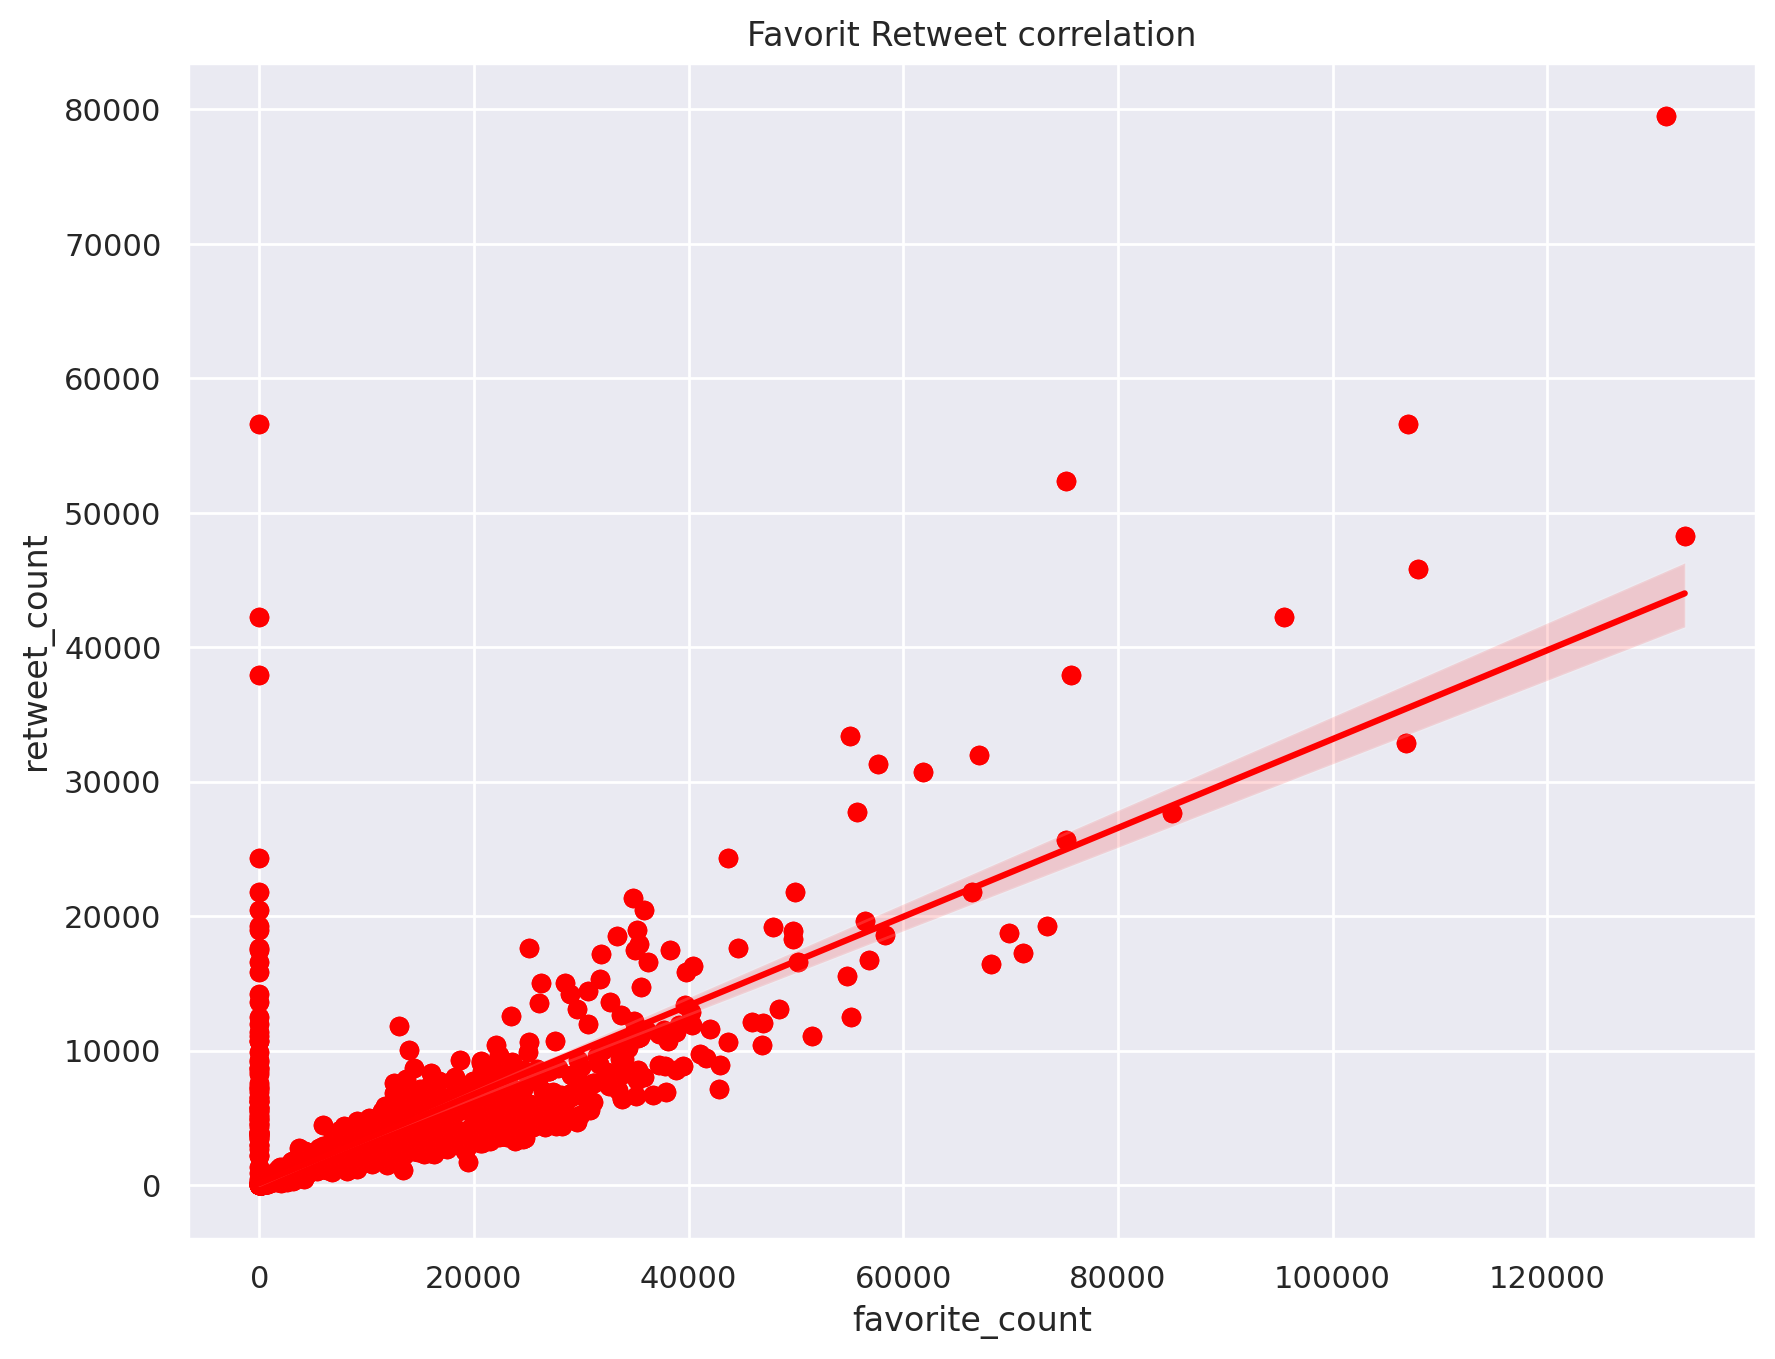

In [1532]:
plt.figure(figsize=(8, 6))
plt.title("Favorit Retweet correlation")


# Create scatter plot
sns.scatterplot(x="favorite_count", y="retweet_count", data=df_master, color='blue')

# Add trendline
sns.regplot(x="favorite_count", y="retweet_count", data=df_master, color='red')


plt.show()

Interesting to see we we have a lot of tweets which are retweetetd but not marked as a favorite

Question 2: How many Pupper, Floofer, puppo and Doggo's do we have in our Dataset?

ValueError: could not convert string to float: 'None'

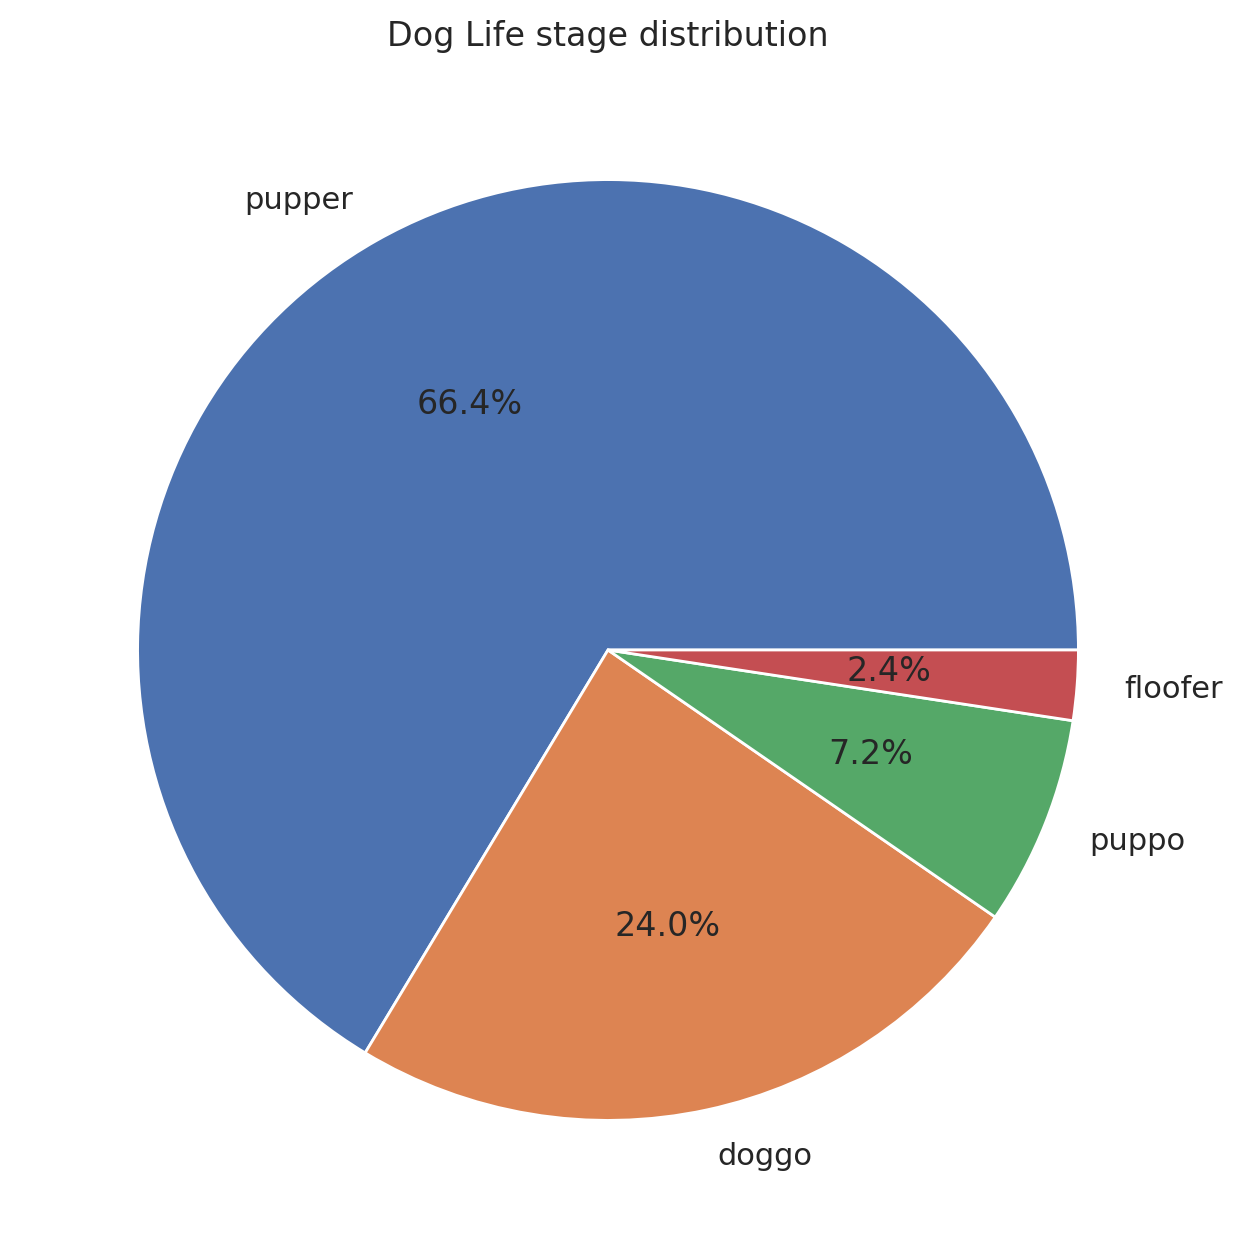

In [1535]:
counts = df_master[df_master['life_stage'] != 'None']['life_stage'].value_counts()
colors = sns.color_palette('pastel')[0:4]

sns.set()

plt.figure(figsize=(6, 6))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title('Dog Life stage distribution')

plt.pie(df_master.life_stage, colors=colors, autopct="%.0f%%")

The conclusion is that most of our Dogs are pupper! The smallest amount of dogs the dataset includes are floofer which is realy sad

Question 3: The top 5 Names for Dogs

In [1553]:
count = df_master.name.value_counts()[0:10]

count

None       2308
a           220
Charlie      44
Penny        40
Oliver       40
Tucker       40
Cooper       40
Lucy         40
Bo           32
Lola         32
Name: name, dtype: int64

As 'None' and 'a' are no real names we can see clearly what Charlie is the most popular Name followed by Penny, Oliver, Tucker, Cooper and Lucy!

So clealy it is not possible to give you only 5 as they have the same count. Now we have the top 6